In [41]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import time

In [22]:
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [7]:
# to ccheck if GPU is actually used for execution (mainly for model trraining and stuff)
tf.debugging.set_log_device_placement(True)

In [23]:
(x_train,y_train), (x_test,y_test) = keras.datasets.mnist.load_data()
# The train set (x_train) contains 60k images each of it is a matrix of size 28*28
# Each image is 28x28 pixels
# Each pixel ranges from 0 to 255
# Test set has 10k images

60000
10000
(28, 28)


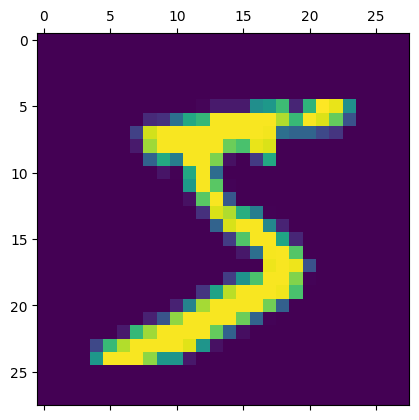

In [24]:
print(len(x_train))
print(len(x_test))
print(x_train[0].shape)
plt.matshow(x_train[0])

In [25]:
x_train.shape

(60000, 28, 28)

In [26]:
# Now we normalize the dataset to make calculations fast and accurate.
# NN expects a flat 1D input, so flatten the 2D 28x28 image into 784-lenght vectors
x_train = x_train/255
x_test = x_test/255

# Flatten the dataset
x_train_flatten = x_train.reshape(len(x_train),28*28)
x_test_flatten = x_test.reshape(len(x_test),28*28)

In [27]:
x_train.shape

(60000, 28, 28)

In [28]:
x_train_flatten.shape

(60000, 784)

In [29]:
x_train_flatten[5999] #x_train_flatten is now an array of vectors

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## Build a Neural Network

In [33]:
# NN with a sinlge layer perceptron. One input layer and one output layer, no hidden layer
# 10 output neurons (one for each digit from 0 to 9)
# input_shape = 784 matches the flattened image shape
# uses sigmoid activation function as it returns probabilites b/w 0 and 1
# Dense Layer (Output Layer)
    # Dense(10) → this is the only trainable layer (i.e., with weights).
    # It has:
        # 784 weights per neuron × 10 neurons = 7,840 weights
        # 10 biases (1 per neuron)
        # Activation: sigmoid applied to each output neuron.

In [34]:
# VERY IMP
# weights adjusted not using the basic perceptron learning rule — 
# instead, we are using gradient-based optimization (Adam + cross-entropy).
# Weights adjusted using backpropogation, not classic perceptron rul

In [42]:
# Sequential groups a linear stack of layers into a Model.
with tf.device('/CPU:0'):
    # keras.layers.Dense(10, input_shape=(784,),
                       # activation='sigmoid')
    model = keras.Sequential([
        keras.Input(shape=(784,)),
        keras.layers.Dense(10, activation='sigmoid')
    ])
    # .compile configures the model for training.
    model.compile(
        optimizer='adam',
        loss = 'sparse_categorical_crossentropy',
        metrics = ['accuracy'])
    start = time.time()
    # .fit Trains the model for a fixed number of epochs
    model.fit(x_train_flatten, y_train, epochs = 50, batch_size=100,verbose=1)
    end=time.time()
    print(f"CPU training time: {end-start:.2f} seconds")
# batch_size = Number of samples processed before the model updates weights once.
# model takes a batch of 100 samples at once, calcualtes combined batch loss from individual sample loss 
# and using this batch loss, and using backpropogation and gradient descent, the weights are updated
# SO weights updated once per batch in an epoch
# USe batch training for parallelisms

# verbose = Controls how much information Keras prints during training.


Epoch 1/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step - accuracy: 0.7534 - loss: 0.9685
Epoch 2/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - accuracy: 0.9027 - loss: 0.3560
Epoch 3/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step - accuracy: 0.9123 - loss: 0.3155
Epoch 4/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step - accuracy: 0.9200 - loss: 0.2885
Epoch 5/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step - accuracy: 0.9204 - loss: 0.2854
Epoch 6/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step - accuracy: 0.9249 - loss: 0.2701
Epoch 7/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step - accuracy: 0.9261 - loss: 0.2666
Epoch 8/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step - accuracy: 0.9259 - loss: 0.2638
Epoch 9/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - accuracy: 0.9274 - loss: 0.2608
Epoch 10/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step - accuracy: 0.9265 - loss: 0.2618
Epoch 11/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step - accuracy: 0.9288 - loss: 0.2539
Epoch 12/50
600/600 ━━━━━━━━━━

In [43]:
# Train using GPU
# GPU training took longer time as it is a very simple model and not enough compute to benfit from GPU
# also Apple GPUs not optimized for parallel dense matrix math
# overhead of moving data to GPU outweighs the speedup
with tf.device('/GPU:0'):
    model = keras.Sequential([
        keras.Input(shape=(784,)),
        keras.layers.Dense(10, activation='sigmoid')
    ])
    # .compile configures the model for training.
    model.compile(
        optimizer='adam',
        loss = 'sparse_categorical_crossentropy',
        metrics = ['accuracy'])
    start = time.time()
    # .fit Trains the model for a fixed number of epochs
    model.fit(x_train_flatten, y_train, epochs = 50, batch_size=100,verbose=1)
    end=time.time()
    print(f"CPU training time: {end-start:.2f} seconds")

Epoch 1/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7466 - loss: 0.9807
Epoch 2/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9021 - loss: 0.3619
Epoch 3/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9133 - loss: 0.3145
Epoch 4/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9174 - loss: 0.2930
Epoch 5/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9213 - loss: 0.2801
Epoch 6/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9217 - loss: 0.2764
Epoch 7/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9236 - loss: 0.2732
Epoch 8/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9264 - loss: 0.2620
Epoch 9/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9267 - loss: 0.2627
Epoch 10/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9280 - loss: 0.2549
Epoch 11/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9300 - loss: 0.2559
Epoch 12/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

In [44]:
type(model)

keras.src.models.sequential.Sequential

## Model Evaluation

In [102]:
loss, accuracy= model.evaluate(x_test_flatten, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9164 - loss: 0.3046


In [103]:
print(f"Loss is {loss} and accurcacy is {accuracy}")

Loss is 0.2696640193462372 and accurcacy is 0.9275000095367432


In [106]:
single_input = x_test[80]         # shape: (28, 28)
flattened_input = single_input.reshape(1, 784)  # reshape to (1, 784)

# Normalize if your training data was normalized (e.g. /255)
# No need to again normalize as x_test is already normalised
# flattened_input = flattened_input / 255.0

# Predict probabilities
pred_probs = model.predict(flattened_input)  # shape: (1, 10)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [107]:
(pred_probs)

array([[1.1035418e-05, 3.1003388e-08, 5.6303607e-04, 4.5931441e-01,
        2.4099877e-01, 4.3272087e-01, 4.2419122e-09, 9.9493635e-01,
        1.9860305e-02, 9.8832393e-01]], dtype=float32)

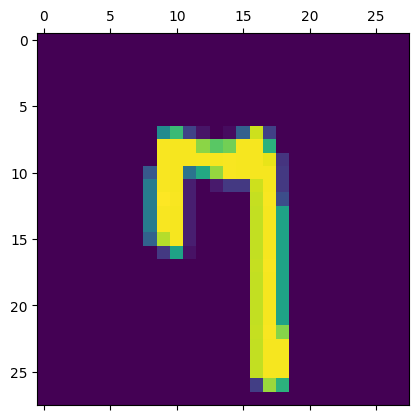

In [108]:
plt.matshow(x_test[80])

In [109]:
np.argmax(pred_probs)

7

In [ ]:
# refered: https://www.geeksforgeeks.org/single-layer-perceptron-in-tensorflow/